# Kiểm tra Giữa Kỳ TKMT - Đề 2

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Ngày: 2024-10-26 (thứ 7): ...</li>
        <li><b>Họ tên: </b>...</li>
        <li><b>MSV: </b>...</li>
        <li><b>STT: </b>...</li>
</div>

Định dạng đặt tên: ```<stt>_<hoten>_GK-thu7.ipynb```


---

## BÀI LÀM

### Câu 1 (6 điểm)

Dataset `ncbirths_10K.csv` khảo sát cân nặng của bé sơ sinh tại Hoa Kỳ, với các thuộc tính:

- fage: tuổi cha
- mage: tuổi mẹ
- mature: phân loại sản phụ
- weeks: thời gian mang thai (tuần)
- premie: cho biết trẻ sinh non hay đủ tháng
- visits: số lần đến bệnh viện thăm khám trong khoảng thời gian thai kỳ (tuần)
- gained: trọng lượng tăng lên trong suốt thời gian thai kỳ (đơn vị: pounds)
- weight: trọng lượng bé khi m (pounds)
- lowbirthweight: xếp loại tình trạng trẻ sơ sinh đủ tháng hay thiếu tháng
- gender: giới tính bé
- habit: tình trạng hút thuốc của sản phụ (hút thuốc, hay không hút thuốc)
- whitemom: sản phụ da trắng hay không?

Bạn hãy trả lời câu hỏi nghiên cứu trên. Sau đây là vài gợi ý:



In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('data/ncbirths_10K.csv')

df.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,not married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,not married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,not married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,not married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,not married,27.0,6.38,not low,female,nonsmoker,not white


a. Đọc bộ dữ liệu và cho biết một số thông tin sau:
- Kích thước?
- Có dữ liệu trống không? Liệt kê các thuộc tính có giá trị trống? (Các giá trị trống nếu có sẽ được ký hiệu là `NA`)



In [37]:
# YOUR CODE HERE
df.shape
# (10000, 13)

(1000, 13)

In [38]:
df.isna().sum()
# Có dữ liệu trống

fage              171
mage                0
mature              0
weeks               2
premie              2
visits              9
marital             1
gained             27
weight              0
lowbirthweight      0
gender              0
habit               1
whitemom            2
dtype: int64

b. Bộ dữ liệu sử dụng đơn vị đo lường của Mỹ: pounds cho cân nặng. Bạn hãy chuyển đổi hai thuộc tính weight (cân nặng của bé) và gained (trọng lượng tăng của sản phụ) sang đơn vị kilogam. Biết rằng 1 pound = 0.45359237 kg



In [39]:
# YOUR CODE HERE
df['weight'] = df['weight'] * 0.45359237
df['gained'] = df['gained'] * 0.45359237

In [40]:
df.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,not married,17.236510,3.460910,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,not married,9.071847,3.574308,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,not married,17.236510,3.007317,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,not married,15.422141,3.628739,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,not married,12.246994,2.893919,not low,female,nonsmoker,not white


c. Dựa vào hai thuộc tính mature (phân loại sản phụ) và mage (tuổi của sản phụ) bạn hãy cho biết theo bộ dữ liệu thì tiêu chí để phân loại sản phụ là:
sản phụ trẻ (younger mom) hay sản phụ trưởng thành (mature mom). Viết code minh chứng.


<Figure size 1000x600 with 0 Axes>

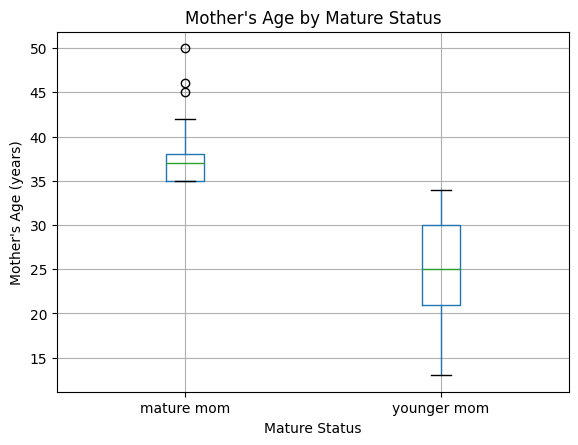

In [41]:
plt.figure(figsize=(10, 6))
df.boxplot(column='mage', by='mature')
plt.title("Mother's Age by Mature Status")
plt.suptitle("")
plt.ylabel("Mother's Age (years)")
plt.xlabel("Mature Status")
plt.show()


- younger mom sẽ có độ tuổi từ 13 - 34
- mature mom sẽ có độ tuổi từ 35 - 50

d. Vẽ đồ thị histogram so sánh trọng lượng của trẻ sơ sinh giữa `younger mom` và `mature mom` trong bộ dữ liệu.



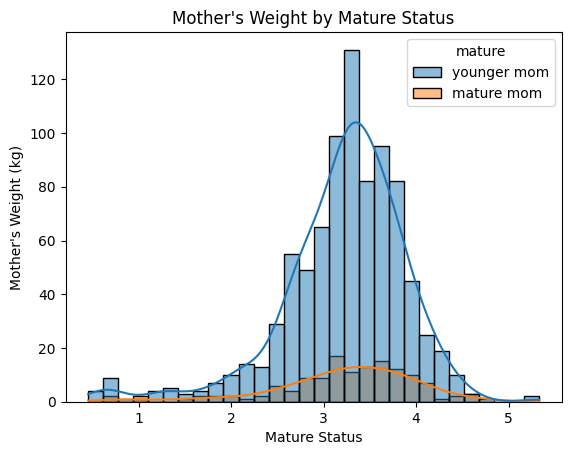

In [42]:
# YOUR CODE HERE
sns.histplot(df, x='weight', hue='mature', bins=30, kde=True)
plt.title("Mother's Weight by Mature Status")
plt.ylabel("Mother's Weight (kg)")
plt.xlabel("Mature Status")
plt.show()

e Vẽ đồ thị boxplot so sánh ảnh hưởng của thói quen hút thuốc của mẹ đến cân nặng của trẻ sơ sinh. Dựa trên bộ dữ liệu theo bạn việc hút thuốc của thai phụ có ảnh
hưởng đến cân nặng của trẻ sơ sinh hay không?



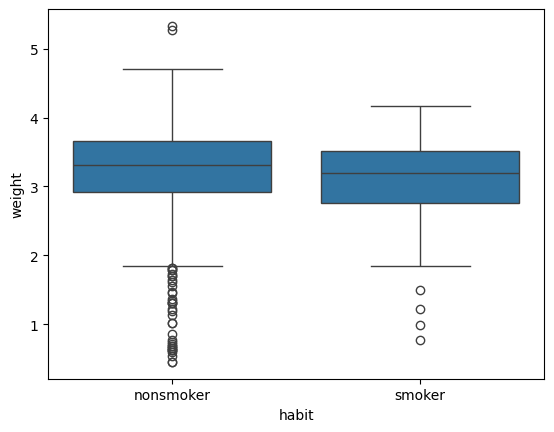

In [43]:
# YOUR CODE HERE
df['habit'].value_counts()
sns.boxplot(df, x='habit', y='weight')
plt.show()

f. Vẽ hai pie-chart so sánh tỉ lệ kết hôn của sản phụ theo màu da

77 637
94 190


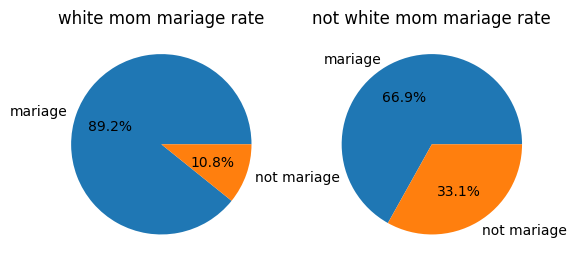

In [44]:
# YOUR CODE HERE
# white
white_not_mariage = df[df['whitemom'] == 'white']['fage'].isna().sum()
white_mariage = len(df[df['whitemom'] == 'white']['fage']) - white_not_mariage

print(white_not_mariage, white_mariage)

# not-white
not_white_not_mariage = df[df['whitemom'] == 'not white']['fage'].isna().sum()
not_white_mariage = len(df[df['whitemom'] == 'not white']['fage']) - not_white_not_mariage

print(not_white_not_mariage, not_white_mariage)

# plot

plt.subplot(1, 2, 1)
plt.pie([white_mariage, white_not_mariage], labels=['mariage', 'not mariage'], autopct='%1.1f%%')
plt.title('white mom mariage rate')
plt.subplot(1, 2, 2)
plt.pie([not_white_mariage, not_white_not_mariage], labels=['mariage', 'not mariage'], autopct='%1.1f%%')
plt.title('not white mom mariage rate')
plt.show()

---
### Câu 2 (2 điểm)

Dataset `ncbirths_1K.csv` là khảo sát cân nặng của bé sơ sinh tại Hoa Kỳ được rút ra từ dataset `ncbirths_10K.csv`:

a. Tính cân nặng trung bình theo kg của các em bé sơ sinh. Biết rằng 1 pound = 0.45359237 kg. Cho biết sai số so với giá trị từ dữ liệu gốc `ncbirths_10K.csv` là bao nhiêu? (Gợi ý: sử dụng hàm `sample()`)



In [45]:
# YOUR CODE HERE
df1k = pd.read_csv('data/ncbirths_1k.csv')
df1k.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,not married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,not married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,not married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,not married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,not married,27.0,6.38,not low,female,nonsmoker,not white


In [46]:
df1k['weight'] = df1k['weight'] * 0.45359237
df1k['gained'] = df1k['gained'] * 0.45359237

In [53]:
print(df1k['weight'].mean())
print(df.sample(1000)['weight'].mean())

3.22095941937
3.2209594193700006


- Sai số giữa `ncbirths_1K.csv` và `ncbirths_10K.csv` là rất nhỏ (không đáng kể).

b. Giả sử thực hiện việc lấy mẫu trên 500 lần (mỗi lần lấy mẫu cỡ 1000 cá thể). Vẽ histogram của các trung bình mẫu thu được và histogram các sai số thu được


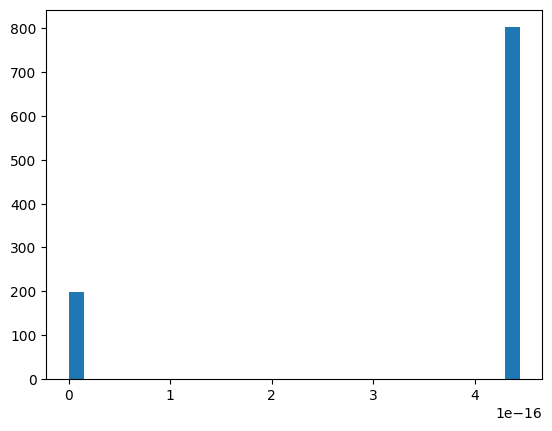

In [56]:
# YOUR CODE HERE
df1k_weight_mean = df1k['weight'].mean()
erorrs = [abs(df1k_weight_mean - df.sample(1000)['weight'].mean()) for _ in range(1000)]

plt.hist(erorrs, bins=30)
plt.show()

---

### Câu 3 (2 điểm)

In [ ]:
from scipy.stats import norm

Nếu biến ngẫu nhiên X có phân phối chuẩn với trung bình là 4 và phương sai là 16. Sử dụng python bạn hãy tính các giá trị sau (làm tròn 3 chữ số thập phân):

a. $P(X < 5.7) = $



In [68]:
# YOUR CODE HERE
from math import sqrt

mu = 3
var = 16
sigma = sqrt(var)

norm_dist = norm(4, sigma)

print(norm_dist.cdf(5.7))

0.6645816626298305


b. $P(X > 7)  = $



In [63]:
# YOUR CODE HERE
print(1 - norm_dist.cdf(7))

0.22662735237686826


c. $P(2.2 < X < 8) = $



In [64]:
# YOUR CODE HERE
print(norm_dist.cdf(8) - norm_dist.cdf(2.2))

0.514989525780623


d Tìm gái trị phân vị thứ 88 của X

In [65]:
# YOUR CODE HERE
print(norm_dist.ppf(0.88))

8.699947168264362


---

## TỰ ĐÁNH GIÁ (0 - 10): 

---